#                                Classification Models to predict rainfall.

Problem Statement:As an ML expert at The Daily Buzz, you are given the task to create a ML model to predict the rainfall.
                  So, you have to create a Machine Learning Model using various Classification Models 
                  including Decision Trees and Ensemble methods, and compare the accuracy of each model.

# PREPROCESSING

In [1]:
#importing pandas,numpy,seaborn and matplotlib libraries
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
#importing data
df=pd.read_csv('C:/Users/tanis/OneDrive/Desktop/sydney_rain prediction.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3337 entries, 0 to 3336
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          3337 non-null   object 
 1   Location      3337 non-null   object 
 2   MinTemp       3334 non-null   float64
 3   MaxTemp       3335 non-null   float64
 4   Rainfall      3331 non-null   float64
 5   Evaporation   3286 non-null   float64
 6   Sunshine      3321 non-null   float64
 7   Humidity9am   3323 non-null   float64
 8   Humidity3pm   3324 non-null   float64
 9   Pressure9am   3317 non-null   float64
 10  Pressure3pm   3318 non-null   float64
 11  Cloud9am      2771 non-null   float64
 12  Cloud3pm      2776 non-null   float64
 13  Temp9am       3333 non-null   float64
 14  Temp3pm       3333 non-null   float64
 15  RainToday     3331 non-null   object 
 16  RainTomorrow  3337 non-null   object 
dtypes: float64(13), object(4)
memory usage: 443.3+ KB


In [3]:
#sample of our data
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,01-02-2008,Sydney,19.5,22.4,15.6,6.2,0.0,92.0,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,Yes,Yes
1,02-02-2008,Sydney,19.5,25.6,6.0,3.4,2.7,83.0,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,Yes,Yes
2,03-02-2008,Sydney,21.6,24.5,6.6,2.4,0.1,88.0,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,Yes,Yes
3,04-02-2008,Sydney,20.2,22.8,18.8,2.2,0.0,83.0,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,Yes,Yes
4,05-02-2008,Sydney,19.7,25.7,77.4,NaN,0.0,88.0,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,Yes,Yes


In [4]:
#deleting rows for missing data for column Rain Today
df.dropna(subset=['RainToday'], inplace=True)

In [5]:
#filling mean values for missing data of other columns
df.fillna(df.mean(), inplace=True)

C:\Users\tanis\AppData\Local\Temp\ipykernel_14796\1067587936.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.mean(), inplace=True)


In [6]:
#checking data after handling missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3331 entries, 0 to 3336
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          3331 non-null   object 
 1   Location      3331 non-null   object 
 2   MinTemp       3331 non-null   float64
 3   MaxTemp       3331 non-null   float64
 4   Rainfall      3331 non-null   float64
 5   Evaporation   3331 non-null   float64
 6   Sunshine      3331 non-null   float64
 7   Humidity9am   3331 non-null   float64
 8   Humidity3pm   3331 non-null   float64
 9   Pressure9am   3331 non-null   float64
 10  Pressure3pm   3331 non-null   float64
 11  Cloud9am      3331 non-null   float64
 12  Cloud3pm      3331 non-null   float64
 13  Temp9am       3331 non-null   float64
 14  Temp3pm       3331 non-null   float64
 15  RainToday     3331 non-null   object 
 16  RainTomorrow  3331 non-null   object 
dtypes: float64(13), object(4)
memory usage: 468.4+ KB


In [7]:
# deleting date since it is not useful for prediction
del df['Date']

In [8]:
# deleting Location since it is Sydney for every row
del df['Location']

In [9]:
#creating dummy variables
df=pd.get_dummies(df)

In [10]:
df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday_No,RainToday_Yes,RainTomorrow_No,RainTomorrow_Yes
0,19.5,22.4,15.6,6.200000,0.0,92.0,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,0,1,0,1
1,19.5,25.6,6.0,3.400000,2.7,83.0,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,0,1,0,1
2,21.6,24.5,6.6,2.400000,0.1,88.0,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,0,1,0,1
3,20.2,22.8,18.8,2.200000,0.0,83.0,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,0,1,0,1
4,19.7,25.7,77.4,5.185396,0.0,88.0,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,0,1,0,1


In [11]:
#deleting RainToday_No
del df['RainToday_No']

In [12]:
#deleting RainTomorrow_No
del df['RainTomorrow_No']

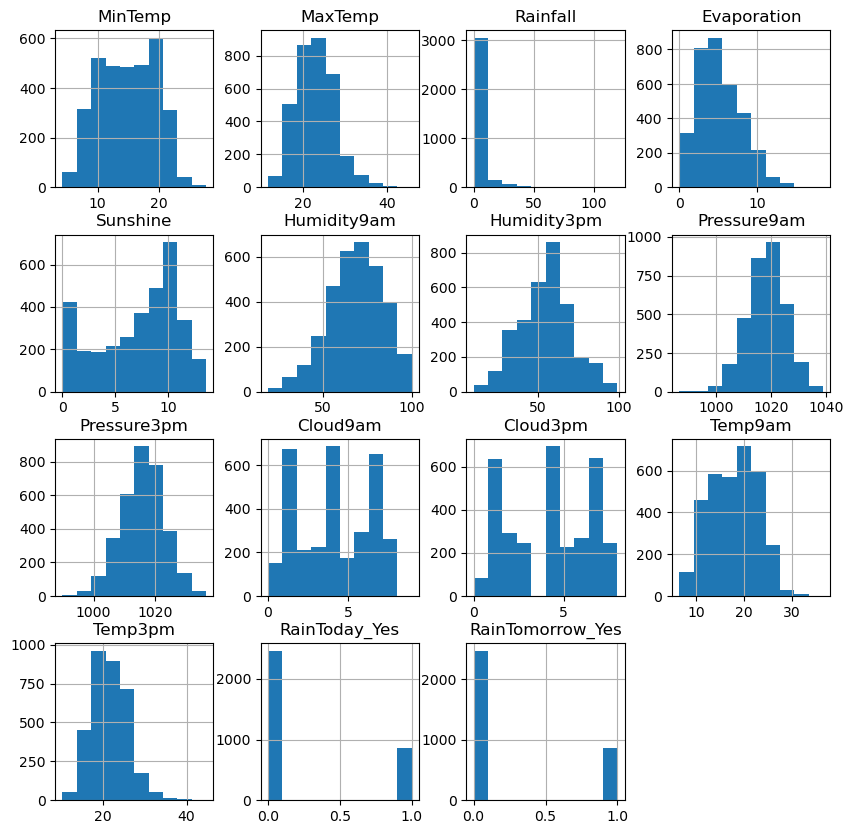

In [13]:
# Histogram for visualisation of data
df.hist(bins=10, figsize=(10,10))
plt.show()

In [14]:
#correlation among variables
df.corr()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday_Yes,RainTomorrow_Yes
MinTemp,1.000000,0.770586,0.012876,0.567019,-0.063452,0.053039,0.271416,-0.392897,-0.355469,0.237297,0.163314,0.938879,0.752182,0.018899,0.079355
MaxTemp,0.770586,1.000000,-0.140102,0.507962,0.324780,-0.185668,-0.151842,-0.387607,-0.423584,-0.086267,-0.100048,0.858639,0.959941,-0.188050,-0.150905
Rainfall,0.012876,-0.140102,1.000000,-0.100598,-0.306328,0.330979,0.301625,-0.037037,0.003215,0.242160,0.200756,-0.056057,-0.143690,0.555191,0.294121
Evaporation,0.567019,0.507962,-0.100598,1.000000,0.173926,-0.394105,-0.101657,-0.344964,-0.299224,-0.036787,-0.038150,0.604551,0.472786,-0.228658,-0.064860
Sunshine,-0.063452,0.324780,-0.306328,0.173926,1.000000,-0.488579,-0.582842,-0.045902,-0.093868,-0.660839,-0.676962,0.113885,0.343199,-0.366554,-0.522603
Humidity9am,0.053039,-0.185668,0.330979,-0.394105,-0.488579,1.000000,0.657478,0.262277,0.250348,0.424002,0.332448,-0.146949,-0.156033,0.400281,0.330739
Humidity3pm,0.271416,-0.151842,0.301625,-0.101657,-0.582842,0.657478,1.000000,0.153372,0.182151,0.454305,0.472250,0.129357,-0.213493,0.342714,0.472619
Pressure9am,-0.392897,-0.387607,-0.037037,-0.344964,-0.045902,0.262277,0.153372,1.000000,0.960418,-0.011641,-0.039841,-0.418549,-0.345046,-0.000356,-0.032630
Pressure3pm,-0.355469,-0.423584,0.003215,-0.299224,-0.093868,0.250348,0.182151,0.960418,1.000000,0.018193,-0.002475,-0.403879,-0.391249,0.056850,0.010966
Cloud9am,0.237297,-0.086267,0.242160,-0.036787,-0.660839,0.424002,0.454305,-0.011641,0.018193,1.000000,0.609702,0.089649,-0.088336,0.316493,0.330646


In [15]:
#data summary
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday_Yes,RainTomorrow_Yes
count,3331.000000,3331.000000,3331.000000,3331.000000,3331.000000,3331.000000,3331.000000,3331.000000,3331.000000,3331.000000,3331.000000,3331.000000,3331.000000,3331.000000,3331.000000
mean,14.863612,22.997026,3.330231,5.185396,7.173635,68.256256,54.717300,1018.349049,1016.021767,4.182803,4.218536,17.814668,21.528674,0.259982,0.259081
std,4.552071,4.488817,9.895172,2.755999,3.802596,15.043902,16.260795,6.997672,7.005448,2.506658,2.411407,4.891371,4.299054,0.438690,0.438196
min,4.300000,11.700000,0.000000,0.000000,0.000000,19.000000,10.000000,986.700000,989.800000,0.000000,0.000000,6.400000,10.200000,0.000000,0.000000
25%,11.000000,19.600000,0.000000,3.200000,4.300000,58.000000,44.000000,1013.800000,1011.300000,2.000000,2.000000,13.800000,18.400000,0.000000,0.000000
50%,14.900000,22.800000,0.000000,4.800000,8.200000,69.000000,56.000000,1018.500000,1016.300000,4.182803,4.218536,18.100000,21.300000,0.000000,0.000000
75%,18.700000,26.000000,1.400000,7.000000,10.200000,80.000000,64.500000,1023.100000,1020.800000,7.000000,7.000000,21.700000,24.500000,1.000000,1.000000
max,27.600000,45.800000,119.400000,18.400000,13.600000,100.000000,99.000000,1039.000000,1036.700000,9.000000,8.000000,36.500000,44.700000,1.000000,1.000000


<Axes: >

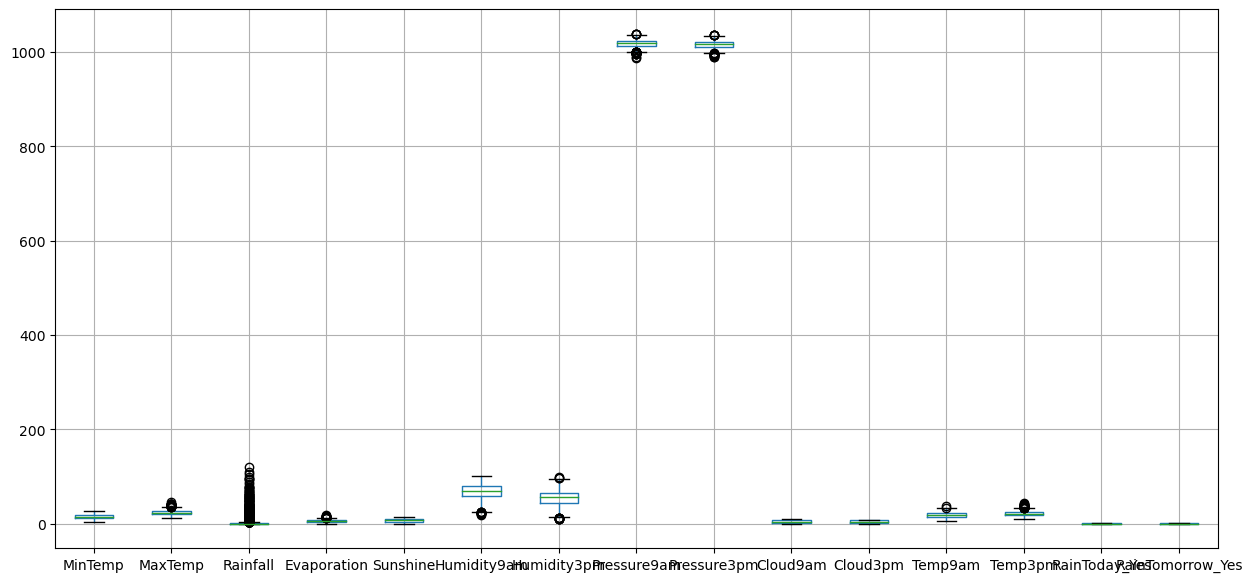

In [16]:
# box plot for outlier detection
df.boxplot(figsize=(15,7))

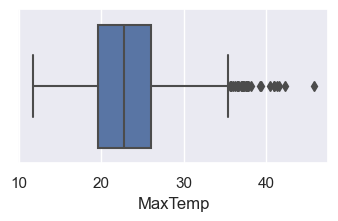

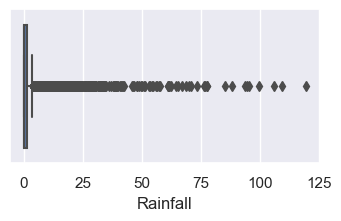

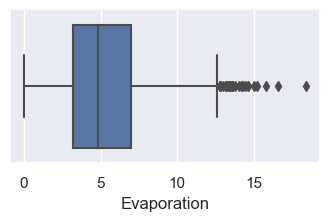

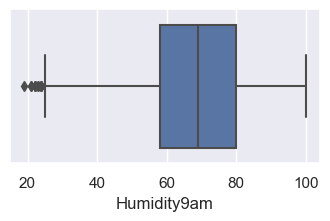

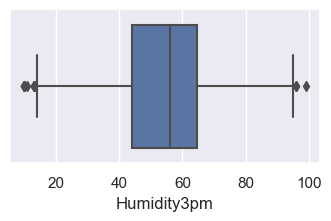

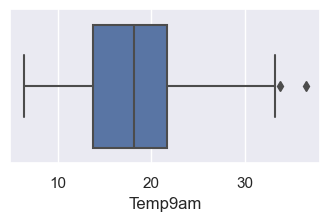

In [17]:
#visualisation using boxplot
sns.set(style="whitegrid")
sns.set(rc={'figure.figsize':(4,2)})
sns.boxplot(x=df['MaxTemp'])
plt.show()
sns.boxplot(x=df['Rainfall'])
plt.show()
sns.boxplot(x=df['Evaporation'])
plt.show()
sns.boxplot(x=df['Humidity9am'])
plt.show()
sns.boxplot(x=df['Humidity3pm'])
plt.show()
sns.boxplot(x=df['Temp9am'])
plt.show()

In [18]:
#identifying outliers in a DataFrame using the Interquartile Range (IQR) method
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
outliers_upper=Q3 + 1.5 * IQR
outliers_lower=Q1 - 1.5 * IQR

In [19]:
#treating MaxTemp by replacing values with mean values
df['MaxTemp'] = np.where(df['MaxTemp'] >outliers_upper['MaxTemp'],np.mean(df['MaxTemp']), df['MaxTemp'])

In [20]:
#treating Evaporation by replacing values with mean values
df['Evaporation'] = np.where(df['Evaporation'] >outliers_upper['Evaporation'],np.mean(df['Evaporation']), df['Evaporation'])

In [21]:
#treating Humidity3pm by replacing values with mean values
df['Humidity3pm'] = np.where((df['Humidity3pm'] >outliers_upper['Humidity3pm'])| (df['Humidity3pm'] <outliers_lower['Humidity3pm']),np.mean(df['Humidity3pm']), df['Humidity3pm'])

In [22]:
#treating Humidity9am by replacing values with mean values
df['Humidity9am'] = np.where(df['Humidity9am'] <outliers_lower['Humidity9am'],np.mean(df['Humidity9am']), df['Humidity9am'])

In [23]:
#treating Temp9am by replacing values with mean values
df['Temp9am'] = np.where(df['Temp9am'] >outliers_upper['Temp9am'],np.mean(df['Temp9am']), df['Temp9am'])

In [24]:
#scaling down Rainfall 
uv=np.percentile(df.Rainfall,[99])[0]
df['Rainfall'] = np.where(df['Rainfall'] > 1.5 * uv, 1.5 * uv, df['Rainfall'])

In [25]:
#data summary after preprocessing
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday_Yes,RainTomorrow_Yes
count,3331.000000,3331.000000,3331.000000,3331.000000,3331.000000,3331.000000,3331.000000,3331.000000,3331.000000,3331.000000,3331.000000,3331.000000,3331.000000,3331.000000,3331.000000
mean,14.863612,22.847252,3.275152,5.093379,7.173635,68.421394,54.822086,1018.349049,1016.021767,4.182803,4.218536,17.804289,21.528674,0.259982,0.259081
std,4.552071,4.220361,9.392195,2.601411,3.802596,14.788897,16.018755,6.997672,7.005448,2.506658,2.411407,4.872861,4.299054,0.438690,0.438196
min,4.300000,11.700000,0.000000,0.000000,0.000000,25.000000,14.000000,986.700000,989.800000,0.000000,0.000000,6.400000,10.200000,0.000000,0.000000
25%,11.000000,19.600000,0.000000,3.200000,4.300000,59.000000,44.000000,1013.800000,1011.300000,2.000000,2.000000,13.800000,18.400000,0.000000,0.000000
50%,14.900000,22.800000,0.000000,4.800000,8.200000,69.000000,56.000000,1018.500000,1016.300000,4.182803,4.218536,18.100000,21.300000,0.000000,0.000000
75%,18.700000,25.800000,1.400000,6.800000,10.200000,80.000000,64.000000,1023.100000,1020.800000,7.000000,7.000000,21.700000,24.500000,1.000000,1.000000
max,27.600000,35.400000,78.570000,12.600000,13.600000,100.000000,95.000000,1039.000000,1036.700000,9.000000,8.000000,33.200000,44.700000,1.000000,1.000000


# Splitting train and test data and standardising

In [26]:
#defining variables
x=df.drop("RainTomorrow_Yes",axis=1)
y=df["RainTomorrow_Yes"]

In [27]:
#dividing data in train and test data with test_size=0.2
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(2664, 14) (667, 14) (2664,) (667,)


In [28]:
#Standardising the train and test data 
from sklearn import preprocessing
scaler=preprocessing.StandardScaler().fit(x_train)
x_train_s=scaler.transform(x_train)
x_test_s=scaler.transform(x_test)

# LOGISTIC REGRESSION

In [29]:
#Logistic Regression model
from sklearn.linear_model import LogisticRegression
clf_lrs=LogisticRegression()

In [30]:
#fiting train_data in the model
clf_lrs.fit(x_train,y_train)

C:\Users\tanis\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [31]:
#coefficient of logistic regression
clf_lrs.coef_

array([[-0.13758621,  0.08003063,  0.03137484,  0.05508559, -0.22831652,
         0.00608897,  0.05627586, -0.05669523,  0.05237669, -0.09873322,
         0.17412063,  0.05303562, -0.01473292,  0.06610061]])

In [32]:
#intercept of logistic regression model
clf_lrs.intercept_

array([0.00087635])

In [33]:
#importing accuracy_sore and confusion_matrix
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score

In [34]:
#prediction of train_data and test_data
y_train_pred=clf_lrs.predict(x_train)
y_test_pred=clf_lrs.predict(x_test)

In [35]:
#confusion_matrix for test_data
confusion_matrix(y_test,y_test_pred)

array([[470,  43],
       [ 74,  80]], dtype=int64)

In [36]:
#confusion_matrix for train_data
confusion_matrix(y_train,y_train_pred)

array([[1802,  153],
       [ 296,  413]], dtype=int64)

In [37]:
#accuracy score for test_data
accuracy_score(y_test,y_test_pred)

0.8245877061469266

In [38]:
#roc_score
roc_auc_score(y_test,clf_lrs.predict(x_test))

0.7178299283562442

In [39]:
#accuracy score for train_data
accuracy_score(y_train,y_train_pred)

0.8314564564564565

# LDA

In [40]:
#LDA model
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [41]:
#fiting train data in the model
lm=LinearDiscriminantAnalysis()
lm.fit(x_train,y_train)

LinearDiscriminantAnalysis()

In [42]:
#confusion_matrix for test_data
confusion_matrix(y_test,lm.predict(x_test))

array([[466,  47],
       [ 73,  81]], dtype=int64)

In [43]:
#confusion_matrix for train_data
confusion_matrix(y_train,lm.predict(x_train))

array([[1787,  168],
       [ 276,  433]], dtype=int64)

In [44]:
#accuracy_score for test_data
accuracy_score(y_test,lm.predict(x_test))

0.8200899550224887

In [45]:
#roc_score
roc_auc_score(y_test,lm.predict(x_test))

0.7171780461254147

In [46]:
#accuracy_score for train_data
accuracy_score(y_train,lm.predict(x_train))

0.8333333333333334

# KNN Classification Model

In [47]:
#KNN classification model
from sklearn.neighbors import KNeighborsClassifier
clf_knn=KNeighborsClassifier(n_neighbors=1)

In [48]:
#fiting the train_data in the model
clf_knn.fit(x_train_s,y_train)

KNeighborsClassifier(n_neighbors=1)

In [49]:
#confusion matrix for test_data
confusion_matrix(y_test,clf_knn.predict(x_test_s))

array([[417,  96],
       [ 76,  78]], dtype=int64)

In [50]:
#accuracy_score for test_data
accuracy_score(y_test,clf_knn.predict(x_test_s))

0.7421289355322339

In [51]:
#roc_score
roc_auc_score(y_test,clf_knn.predict(x_test_s))

0.659679501784765

In [52]:
#importing GridSearchCV
from sklearn.model_selection import GridSearchCV

In [53]:
#defining n_neighbors values range to obtain the optimal value
params={'n_neighbors':[1,2,3,4,5,6,7,8,9,10,13,16,19,20]}

In [54]:
#using grid search to tune hyperparameter 
grid_search_knn=GridSearchCV(KNeighborsClassifier(),params)

In [55]:
#fiting the train_data
grid_search_knn.fit(x_train_s,y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 13, 16,
                                         19, 20]})

In [56]:
#finding the best value of n_neighbor
grid_search_knn.best_params_

{'n_neighbors': 16}

In [57]:
#storing the optimal KNN model obtained using best_estimator
optimised_KNN=grid_search_knn.best_estimator_

In [58]:
#predicting value based on the optimal model
y_test_pred=optimised_KNN.predict(x_test_s)

In [59]:
#confusion matrix of test_data for optimal parameters
confusion_matrix(y_test,y_test_pred)

array([[488,  25],
       [ 89,  65]], dtype=int64)

In [60]:
#accuracy of test_data for optimal model
accuracy_score(y_test,y_test_pred)

0.8290854572713643

In [61]:
#roc_score
roc_auc_score(y_test,optimised_KNN.predict(x_test_s))

0.6866724893040682

# DECISION TREE CLASSIFICATION

In [62]:
#Decision Tree classification
from sklearn import tree
clftree=tree.DecisionTreeClassifier(max_depth=3)

In [63]:
#fiting the train_data in the model
clftree.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [64]:
#predicting values based on the model
y_train_pred=clftree.predict(x_train)
y_test_pred=clftree.predict(x_test)

In [65]:
#confusion_matrix for test_data
confusion_matrix(y_test,y_test_pred)

array([[463,  50],
       [ 79,  75]], dtype=int64)

In [66]:
#confusion_matrix for train_data
confusion_matrix(y_train,y_train_pred)

array([[1768,  187],
       [ 275,  434]], dtype=int64)

In [67]:
#accuracy for test_data
accuracy_score(y_test,y_test_pred)

0.8065967016491754

In [68]:
#roc_score
roc_auc_score(y_test,clftree.predict(x_test))

0.6947735500367078

In [69]:
#accuracy for train_data
accuracy_score(y_train,y_train_pred)

0.8265765765765766

In [70]:
#exporting the decision tree visualization into the Graphviz DOT format.
dot_data=tree.export_graphviz(clftree,out_file=None)

In [71]:
#visualizing the decision tree within an IPython Notebook using Image and pydotplus
from IPython.display import Image
import pydotplus

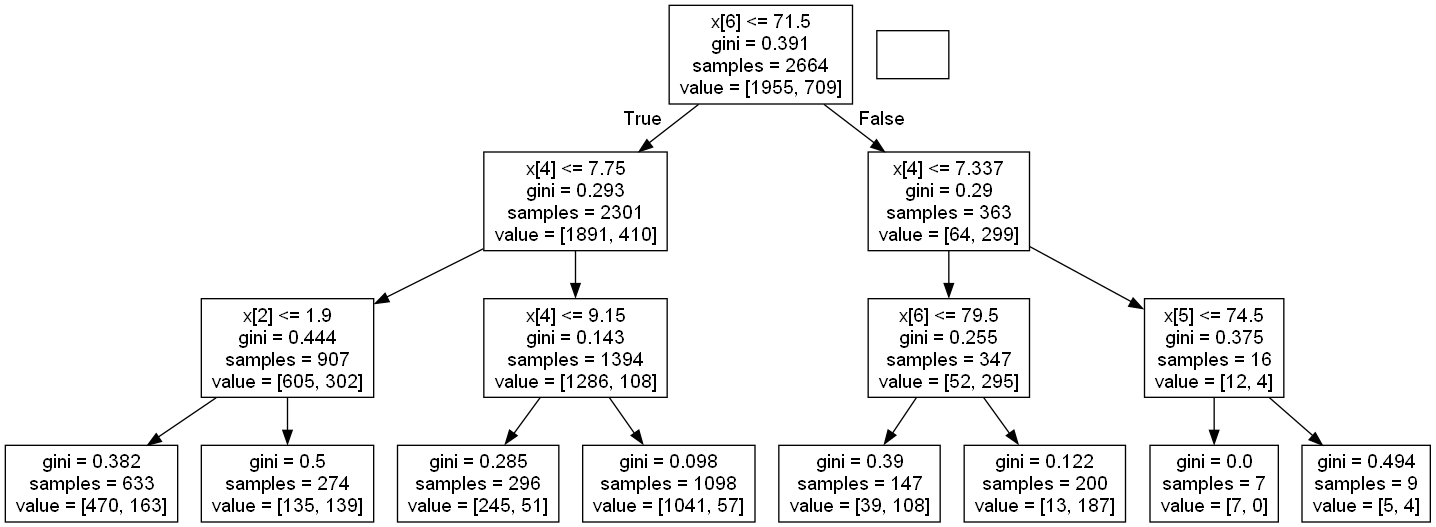

In [72]:
#generateing a graph from the DOT data and then displaying the resulting decision tree 
graph=pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [73]:
#using Bagging technique
from sklearn.ensemble import BaggingClassifier
bag_clf=BaggingClassifier(base_estimator=clftree,n_estimators=1000,bootstrap=True,n_jobs=-1,random_state=42)

In [74]:
#fiting train_data in the model
bag_clf.fit(x_train,y_train)

C:\Users\tanis\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),
                  n_estimators=1000, n_jobs=-1, random_state=42)

In [75]:
#confusion_matrix for test_data using bagging technique
confusion_matrix(y_test,bag_clf.predict(x_test))

array([[491,  22],
       [ 97,  57]], dtype=int64)

In [76]:
#confusion_matrix for train_data using bagging technique
confusion_matrix(y_train,bag_clf.predict(x_train))

array([[1876,   79],
       [ 344,  365]], dtype=int64)

In [77]:
#accuracy_score for test_data using bagging technique
accuracy_score(y_test,bag_clf.predict(x_test))

0.8215892053973014

In [78]:
#roc_score
roc_auc_score(y_test,bag_clf.predict(x_test))

0.6636224399382293

In [79]:
#accuracy_score for train_data using bagging technique
accuracy_score(y_train,bag_clf.predict(x_train))

0.8412162162162162

In [80]:
#using grid search to tune hyperparameter
clftree_g=tree.DecisionTreeClassifier(min_samples_leaf=5,max_depth=4)
params_grid={"max_depth":[4,5,6,7,8,9,10,11,12,13,18,20],
"min_samples_leaf":[2,3,4,5,6,7,8,9,10,20,25,30,45,50],}
grid_search=GridSearchCV(clftree_g,params_grid,n_jobs=-1,cv=5,scoring='accuracy')
#fiting train_data in the  model
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(max_depth=4, min_samples_leaf=5),
             n_jobs=-1,
             param_grid={'max_depth': [4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 18,
                                       20],
                         'min_samples_leaf': [2, 3, 4, 5, 6, 7, 8, 9, 10, 20,
                                              25, 30, 45, 50]},
             scoring='accuracy')

In [81]:
#finding optimal parameters
grid_search.best_params_

{'max_depth': 4, 'min_samples_leaf': 8}

In [82]:
#storing the optimal Decision Tree model obtained using best_estimator
clftree_g=grid_search.best_estimator_

In [83]:
#confusion_matrix of test_data for optimal model
confusion_matrix(y_test,clftree_g.predict(x_test))

array([[489,  24],
       [ 90,  64]], dtype=int64)

In [84]:
#accuracy_score of test_data for optimal model
accuracy_score(y_test,clftree_g.predict(x_test))

0.8290854572713643

In [85]:
#roc_score
roc_auc_score(y_test,clftree_g.predict(x_test))

0.6844003949267108

In [86]:
#exporting the decision tree visualization into the Graphviz DOT format for optimal model
dot_data_g=tree.export_graphviz(clftree_g,out_file=None,feature_names=x_train.columns,filled=True)

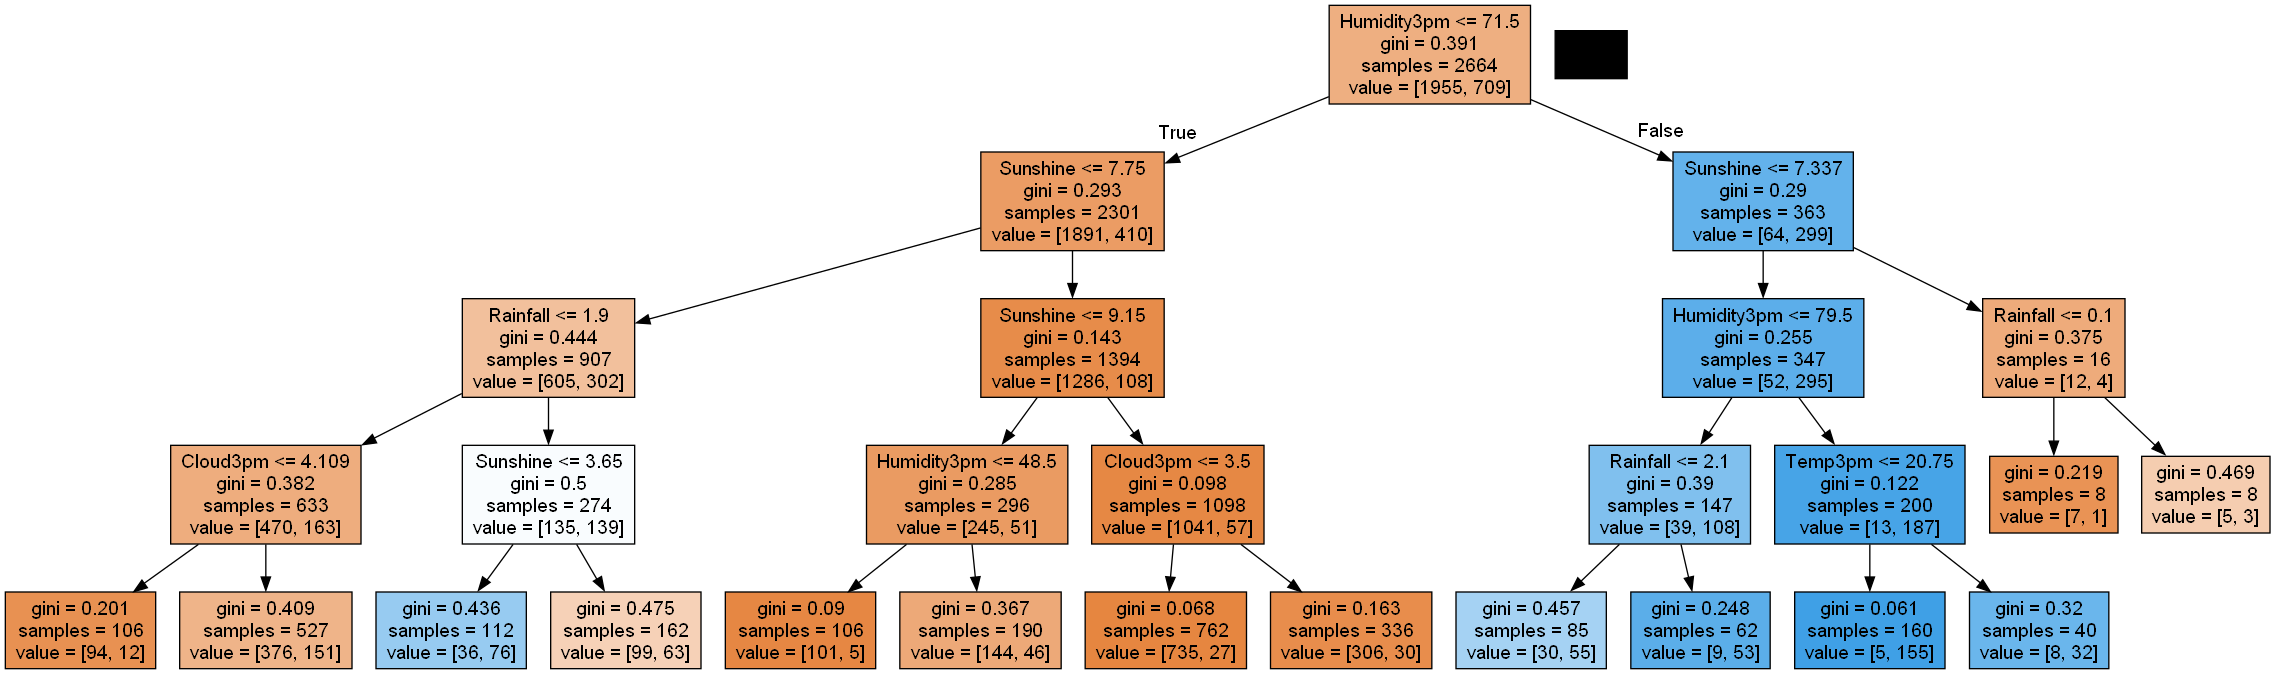

In [87]:
#generating a graph from the DOT data and then displaying the resulting decision tree for optimal model
graph_g=pydotplus.graph_from_dot_data(dot_data_g)
Image(graph_g.create_png())

# Random Forest Classification

In [88]:
#Random Forest classifier
from sklearn.ensemble import RandomForestClassifier
rf_clf=RandomForestClassifier(n_estimators=1000,bootstrap=True,n_jobs=-1,random_state=42)

In [89]:
#fiting train_data in the model
rf_clf.fit(x_train,y_train)

RandomForestClassifier(n_estimators=1000, n_jobs=-1, random_state=42)

In [90]:
#confusion_matrix for test_data
confusion_matrix(y_test,rf_clf.predict(x_test))

array([[474,  39],
       [ 81,  73]], dtype=int64)

In [91]:
#accuracy_score for test_data
accuracy_score(y_test,rf_clf.predict(x_test))

0.8200899550224887

In [92]:
#roc_score
roc_auc_score(y_test,rf_clf.predict(x_test))

0.6990012911065543

In [93]:
#using gridsearch to tune hyperparameters
rf_clf_g=RandomForestClassifier(n_estimators=250,random_state=42)
params_grid={"max_features":[4,5,6,7,8,9,10,11,12,13,18,20],
"min_samples_split":[2,3,4,5,6,7,8,9,10],}
grid_search=GridSearchCV(rf_clf_g,params_grid,n_jobs=-1,cv=5,scoring='accuracy')
#fiting train_data in the model
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(n_estimators=250,
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_features': [4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 18,
                                          20],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10]},
             scoring='accuracy')

In [94]:
##finding optimal parameters
grid_search.best_params_

{'max_features': 6, 'min_samples_split': 6}

In [95]:
#storing the optimal Decision Tree model obtained using best_estimator
cvrf_clf=grid_search.best_estimator_

In [96]:
#confusion_matrix of test_data for optimal model
confusion_matrix(y_test,cvrf_clf.predict(x_test))

array([[471,  42],
       [ 78,  76]], dtype=int64)

In [97]:
#accuracy_score of test_data for optimal model
accuracy_score(y_test,cvrf_clf.predict(x_test))

0.8200899550224887

In [98]:
#roc_score
roc_auc_score(y_test,cvrf_clf.predict(x_test))

0.7058175742386269

# Gradient Boosting

In [99]:
#Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier 
gbc_clf=GradientBoostingClassifier()

In [100]:
#fiting train_data in the model
gbc_clf.fit(x_train,y_train)

GradientBoostingClassifier()

In [101]:
#confusion_matrix of test_data
confusion_matrix(y_test,gbc_clf.predict(x_test))

array([[479,  34],
       [ 81,  73]], dtype=int64)

In [102]:
#accuracy_score of test_data
accuracy_score(y_test,gbc_clf.predict(x_test))

0.8275862068965517

In [103]:
#roc_score
roc_auc_score(y_test,gbc_clf.predict(x_test))

0.7038745854535328

In [104]:
#gradient boosting regressor with specific hyperparameters
gbc_clf_l=GradientBoostingClassifier(learning_rate=0.02,n_estimators=1000,max_depth=1)
#fiting train_data in model
gbc_clf_l.fit(x_train,y_train)

GradientBoostingClassifier(learning_rate=0.02, max_depth=1, n_estimators=1000)

In [105]:
#confusion_matrix of train_data
confusion_matrix(y_train,gbc_clf_l.predict(x_train))

array([[1856,   99],
       [ 307,  402]], dtype=int64)

In [106]:
#accuracy_score of test_data
accuracy_score(y_test,gbc_clf_l.predict(x_test))

0.8350824587706147

In [107]:
#defining range for parameter
param_test1 = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 500, 1000],
    'max_depth': [1, 2, 3]}

In [108]:
#using gridsearch for hyperparameter tuning
grid_search=GridSearchCV(gbc_clf_l,param_test1, cv=5, scoring='accuracy', n_jobs=-1)
#fiting train_data
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5,
             estimator=GradientBoostingClassifier(learning_rate=0.02,
                                                  max_depth=1,
                                                  n_estimators=1000),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [1, 2, 3],
                         'n_estimators': [100, 500, 1000]},
             scoring='accuracy')

In [109]:
#storing the optimal model obtained using best_estimator
gb_clf_best = grid_search.best_estimator_

In [110]:
#confusion_matrix of test_data for optimal model
confusion_matrix(y_test,gb_clf_best.predict(x_test))

array([[487,  26],
       [ 81,  73]], dtype=int64)

In [111]:
#accuracy_score of test_data for optimal model
accuracy_score(y_test,gb_clf_best.predict(x_test))

0.8395802098950524

In [112]:
#roc_score
roc_auc_score(y_test,gb_clf_best.predict(x_test))

0.7116718564086985

In [113]:
#finding optimal parameters
grid_search.best_params_

{'learning_rate': 0.1, 'max_depth': 1, 'n_estimators': 1000}

# ADA Boost

In [114]:
#ADA Boost for test_size=0.2
from sklearn.ensemble import AdaBoostClassifier  
ada_clf=AdaBoostClassifier(learning_rate=0.02,n_estimators=5000)

In [115]:
#fiting train_data in model
ada_clf.fit(x_train,y_train)

AdaBoostClassifier(learning_rate=0.02, n_estimators=5000)

In [116]:
#confusion_matrix of train_data
confusion_matrix(y_train,ada_clf.predict(x_train))

array([[1864,   91],
       [ 286,  423]], dtype=int64)

In [117]:
#accuracy_score of test_data
accuracy_score(y_test,ada_clf.predict(x_test))

0.8350824587706147

In [118]:
#roc_score
roc_auc_score(y_test,ada_clf.predict(x_test))

0.7042036910457964

In [119]:
#Ada boosting regressor with specific hyperparameters
ada_clf_l=AdaBoostClassifier(learning_rate=0.02,n_estimators=1000)
#fiting train_data in model
ada_clf_l.fit(x_train,y_train)

AdaBoostClassifier(learning_rate=0.02, n_estimators=1000)

In [120]:
#defining range for parameters
param_test = {
    'n_estimators': [100, 500, 1000],
    'learning_rate': [0.01, 0.1, 0.2]
}

In [121]:
#using gridsearch for hyperparameter tuning
grid_search=GridSearchCV(ada_clf_l,param_test, cv=5, scoring='accuracy', n_jobs=-1)
#fiting train_data
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5,
             estimator=AdaBoostClassifier(learning_rate=0.02,
                                          n_estimators=1000),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'n_estimators': [100, 500, 1000]},
             scoring='accuracy')

In [122]:
#storing the optimal model obtained using best_estimator
ada_clf_best = grid_search.best_estimator_

In [123]:
#confusion_matrix of test_data for optimal model
confusion_matrix(y_test,ada_clf_best.predict(x_test))

array([[481,  32],
       [ 83,  71]], dtype=int64)

In [124]:
#accuracy_score of test_data for optimal model
accuracy_score(y_test,ada_clf_best.predict(x_test))

0.8275862068965517

In [125]:
#roc_score
roc_auc_score(y_test,ada_clf_best.predict(x_test))

0.6993303966988178

In [126]:
#finding optimal parameters
grid_search.best_params_

{'learning_rate': 0.2, 'n_estimators': 500}

# XG Boost

In [127]:
#XG Boost 
import xgboost as xgb  
xgb_clf=xgb.XGBClassifier(max_depth=5,n_estimators=500,learning_rate=0.3,n_jobs=-1)

In [128]:
#fiting train_data in the model
xgb_clf.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=500, n_jobs=-1, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [129]:
#confusion_matrix for test_data
confusion_matrix(y_test,xgb_clf.predict(x_test))

array([[458,  55],
       [ 74,  80]], dtype=int64)

In [130]:
#accuracy_score for test_data
accuracy_score(y_test,xgb_clf.predict(x_test))

0.8065967016491754

In [131]:
#roc_score
roc_auc_score(y_test,xgb_clf.predict(x_test))

0.7061340219234956

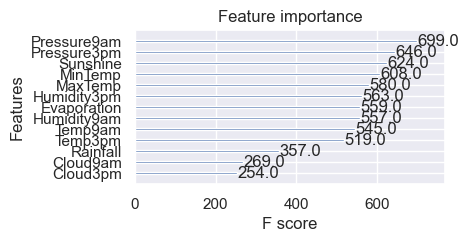

In [132]:
#visualizing importance features
xgb.plot_importance(xgb_clf)
plt.show()

In [133]:
#XG Boost regressor with specific hyperparameters
xgb_clf_l=xgb.XGBClassifier(n_estimators=500,learning_rate=0.1,random_state=42)

In [134]:
#defining range for parameters
param_test1={
'max_depth':range(3,10,2),
'gamma':[0.1,0.2,0.3],
'subsample':[0.8,0.9],
'colsample_bytree':[0.8,0.9],
'reg_alpha':[1e-2,0.1,1]
}

In [135]:
#using gridsearch for hyperparameter tuning
grid_search=GridSearchCV(xgb_clf_l,param_test1,n_jobs=-1,cv=5,scoring='accuracy')
#fiting train_data in the model
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=0.1, m...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=500, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=42, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 0.9],
                         'gamma': [0.1, 0.2, 0.3], 'max_depth': range(3, 10, 2),
                         'reg_alpha': [0.01, 0.1, 1], 'subsample': [0.8, 0.9]},
             scoring='accuracy')

In [136]:
#storing the optimal model obtained using best_estimator
xgb_clf_best=grid_search.best_estimator_

In [137]:
#confusion_matrix for test_data
confusion_matrix(y_test,xgb_clf_best.predict(x_test))

array([[473,  40],
       [ 78,  76]], dtype=int64)

In [138]:
#accuracy_score for test_data
accuracy_score(y_test,xgb_clf_best.predict(x_test))

0.823088455772114

In [139]:
#roc_score
roc_auc_score(y_test,xgb_clf_best.predict(x_test))

0.7077668919774183

In [140]:
#finding optimal parameters
grid_search.best_params_

{'colsample_bytree': 0.8,
 'gamma': 0.3,
 'max_depth': 3,
 'reg_alpha': 1,
 'subsample': 0.9}

QUESTIONS:

1. Your views about the problem statement?

This problem statement provides a practical scenario that involves real-world challenges in data preprocessing, data extraction and model selection. It encourages thoughtful analysis and experimentation to arrive at the best possible predictive model to pedict rainfall in Sydney.

2. What will be your approach to solving this task?

I will follow these steps in order to create the most accurate model for this probelm:

1)PREPROCESSING: Data preprocessing involves eliminating irrelevant data and shaping it to our requirements. For this task I                      will remove unnecessary columns,then create dummy variables and eliminate highly correlated independent                          variables or redundant information. Additionally, I will detect outliers using techniques such as box plots and                  joint plots, and consider data transformation if needed.

2)TRAINING DATA: Training and then testing data is an important part for building an ML model.In this case, due to the dataset's                  size, I will partition the data into an 80:20 ratio for training and testing, respectively.

3)USING CLASSIFICATION MODELS: Next, I will explore various classification models, including ensemble techniques, hyperparameter                                tuning,and regularization methods, individually.By systematically evaluating each model I                                        will find out the accuracy score of each and create a confusion matrix to evaluate the
                               performance.

3. What were the available ML model options you had to perform this task?

For this task i used Logistic Regression,LDA,Decision Tree Classification,Random Forest Classification, KNN Classification, Boosting techniques along with ensemble techniques and grid search method to get the best model.

4. Which model’s performance is best and what could be the possible reason for that?

For this task, I achieved the highest accuracy using the Decision Tree method with GridSearchCV to determine the best possible hyperparameters for tuning. The reasons for this success are manifold: Decision Trees excel when dealing with nonlinear relationships between features and the target variable,and their interpretability is another key advantage.Also tuning hyperparameters using GridSearchCV helped in optimising Decision Tree performance.

5. What steps can you take to improve this selected model’s performance even further?

For this task, I have attempted various methods to enhance accuracy, including optimal preprocessing, ensemble techniques, and hyperparameter tuning. I believe that further improvement can be achieved by incorporating more data.